In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
connection = sqlite3.connect(r"C:\Users\Lenovo\Desktop\Zomato_EDA\Resources\zomato_rawdata.sqlite")

In [4]:
df = pd.read_sql_query("SELECT * FROM users" , connection)

df.head()

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


# Data Cleaning

In [5]:
df = df.drop(["url" , "address" , "phone"] , axis = 1)
df.rename(columns={'listed_in(type)': 'type', 'listed_in(city)': 'city_location'}, inplace=True)

df.head(3)

,index,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,type,city_location
0,0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari


In [7]:
df.isnull()

,index,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,type,city_location
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
51713,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False
51714,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False
51715,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
df.isnull().sum()

index                              0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
type                               0
city_location                      0
dtype: int64

In [10]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', None, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [11]:
clean_df = df['rate'].replace(('NEW' , '-') , np.nan , inplace=True)

df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', nan, '2.9/5', '3.5/5', None, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [12]:
clean_df2 = df['rate'] = df['rate'].apply(lambda x : float(x.split('/')[0]) if type(x)==str else x)

clean_df2

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51712    3.6
51713    NaN
51714    NaN
51715    4.3
51716    3.4
Name: rate, Length: 51717, dtype: float64

# Restaurant Ratings by Online Order Option

In [13]:
online_order_pivot = df.pivot_table(index='rate',
                   columns='online_order',
                   aggfunc='size', fill_value=0)

#OR online_order_pivot = pd.crosstab(df['rate'] , df['online_order'])

online_order_pivot

online_order,No,Yes
rate,,
1.8,5,0
2.0,11,0
2.1,9,15
2.2,10,16
2.3,29,22
2.4,36,34
2.5,38,63
2.6,83,177
2.7,141,166


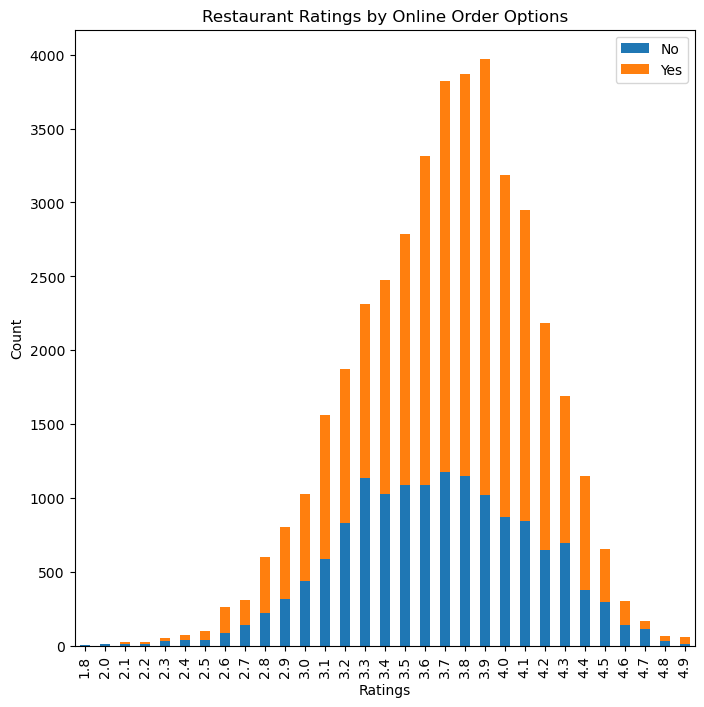

In [14]:
ax = online_order_pivot.plot(kind = 'bar' , stacked=True , figsize = (8,8))

ax.set_title("Restaurant Ratings by Online Order Options")
ax.set_xlabel ("Ratings")
ax.set_ylabel("Count")

ax.legend()
plt.show()


# Percentage Distribution of Ratings by Online Order Availabilit

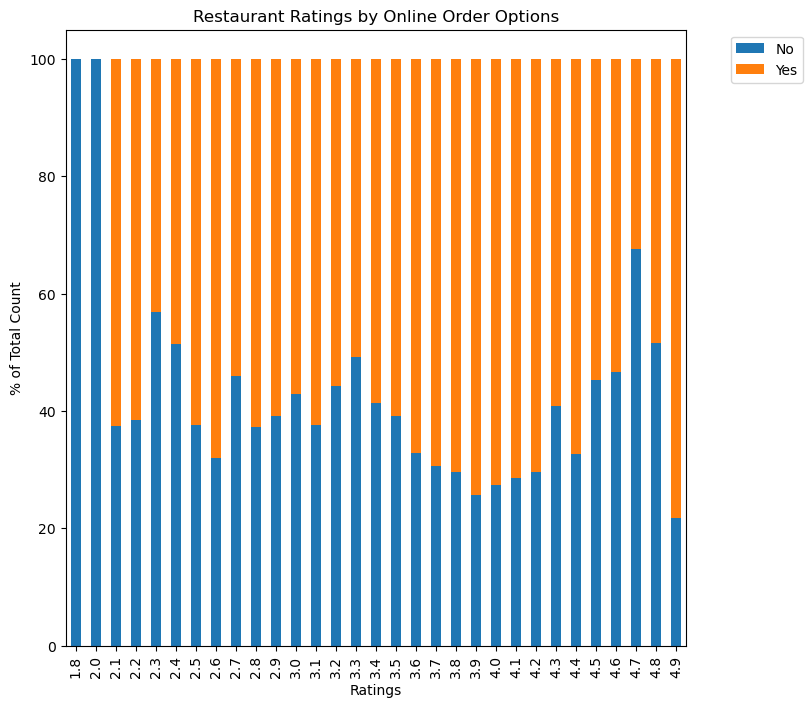

In [15]:
online_order_pivot = online_order_pivot.apply(lambda x: x*100 / sum(x) , axis = 1)

online_order_pivot

ax = online_order_pivot.plot(kind = 'bar' , stacked=True , figsize = (8,8))

ax.set_title("Restaurant Ratings by Online Order Options")
ax.set_xlabel ("Ratings")
ax.set_ylabel("% of Total Count")

ax.legend(bbox_to_anchor = (1.2,1))
plt.show()

# Online Order Availability

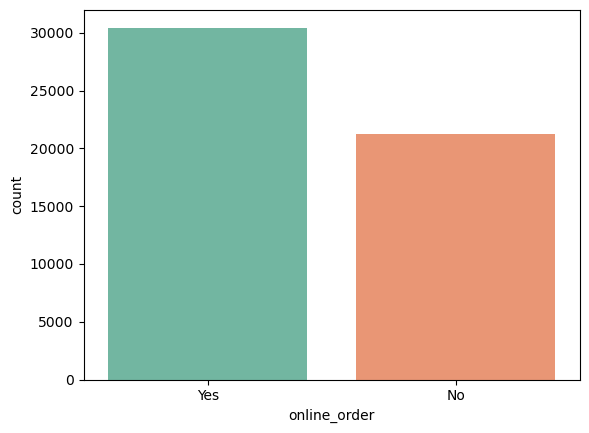

In [16]:
plt.figure()

sns.countplot(x='online_order',
              data=df,
              palette='Set2');

# Analysis of Booking Patterns

<Axes: xlabel='book_table', ylabel='count'>

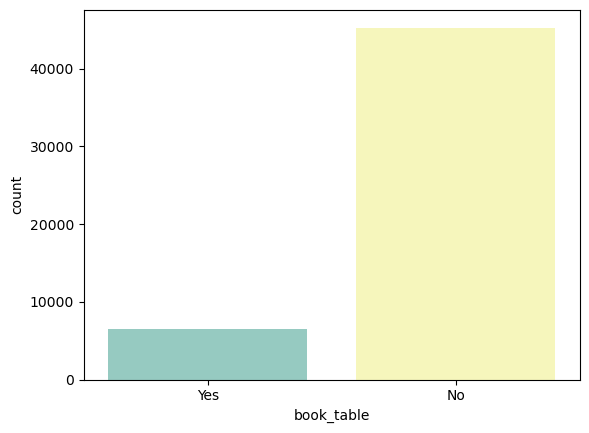

In [18]:
plt.figure()

sns.countplot( x ='book_table',
              data = df,
              palette = 'Set3')

# Restaurant Types vs Customer Ratings

<Axes: xlabel='type', ylabel='rate'>

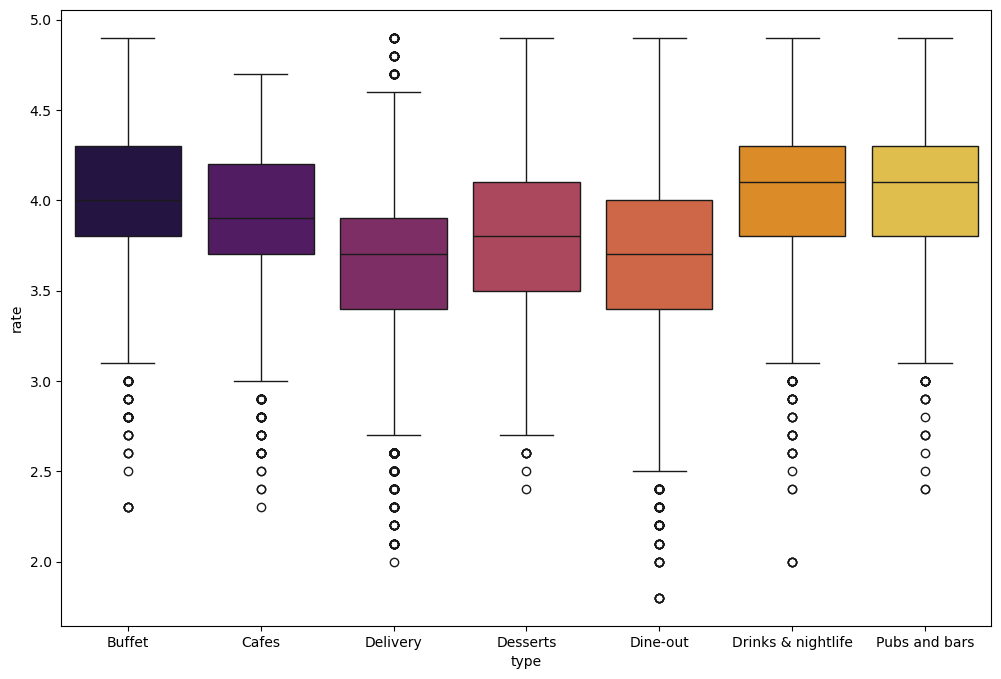

In [20]:
plt.figure(figsize = (12, 8))
sns.boxplot(x = 'type', y = 'rate', data = df, palette = 'inferno')

# Restaurant Type and Rating Distribution

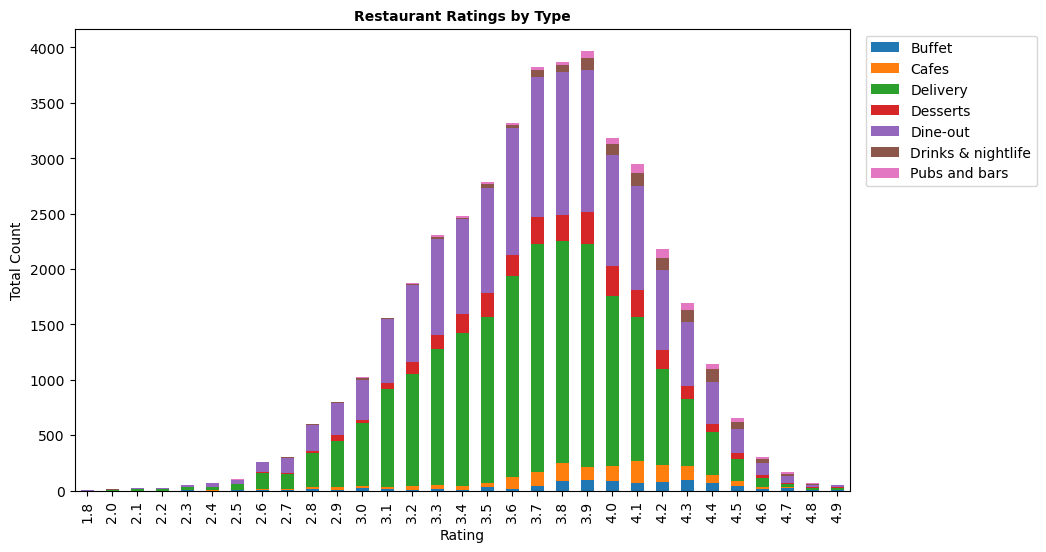

In [22]:
type_vs_rating = df.pivot_table(index='rate',
                   columns='type',
                   aggfunc='size', fill_value=0)

# Plot the data as a stacked bar chart
ax = type_vs_rating.plot(kind='bar', 
                         stacked=True, 
                         figsize=(10, 6))


ax.set_title('Restaurant Ratings by Type', fontsize=10, fontweight='bold')
ax.set_xlabel('Rating')
ax.set_ylabel('Total Count')

ax.legend(bbox_to_anchor=(1.25, 1))
plt.show()

# Location-Wise Vote Breakdown

In [24]:
votes_by_location = df[['location' , 'votes']].drop_duplicates().groupby('location').sum().sort_values('votes' , ascending = False )

votes_by_location.head()

,votes
location,
Koramangala 5th Block,1063081
Indiranagar,653073
Church Street,291543
Koramangala 4th Block,282003
JP Nagar,277901


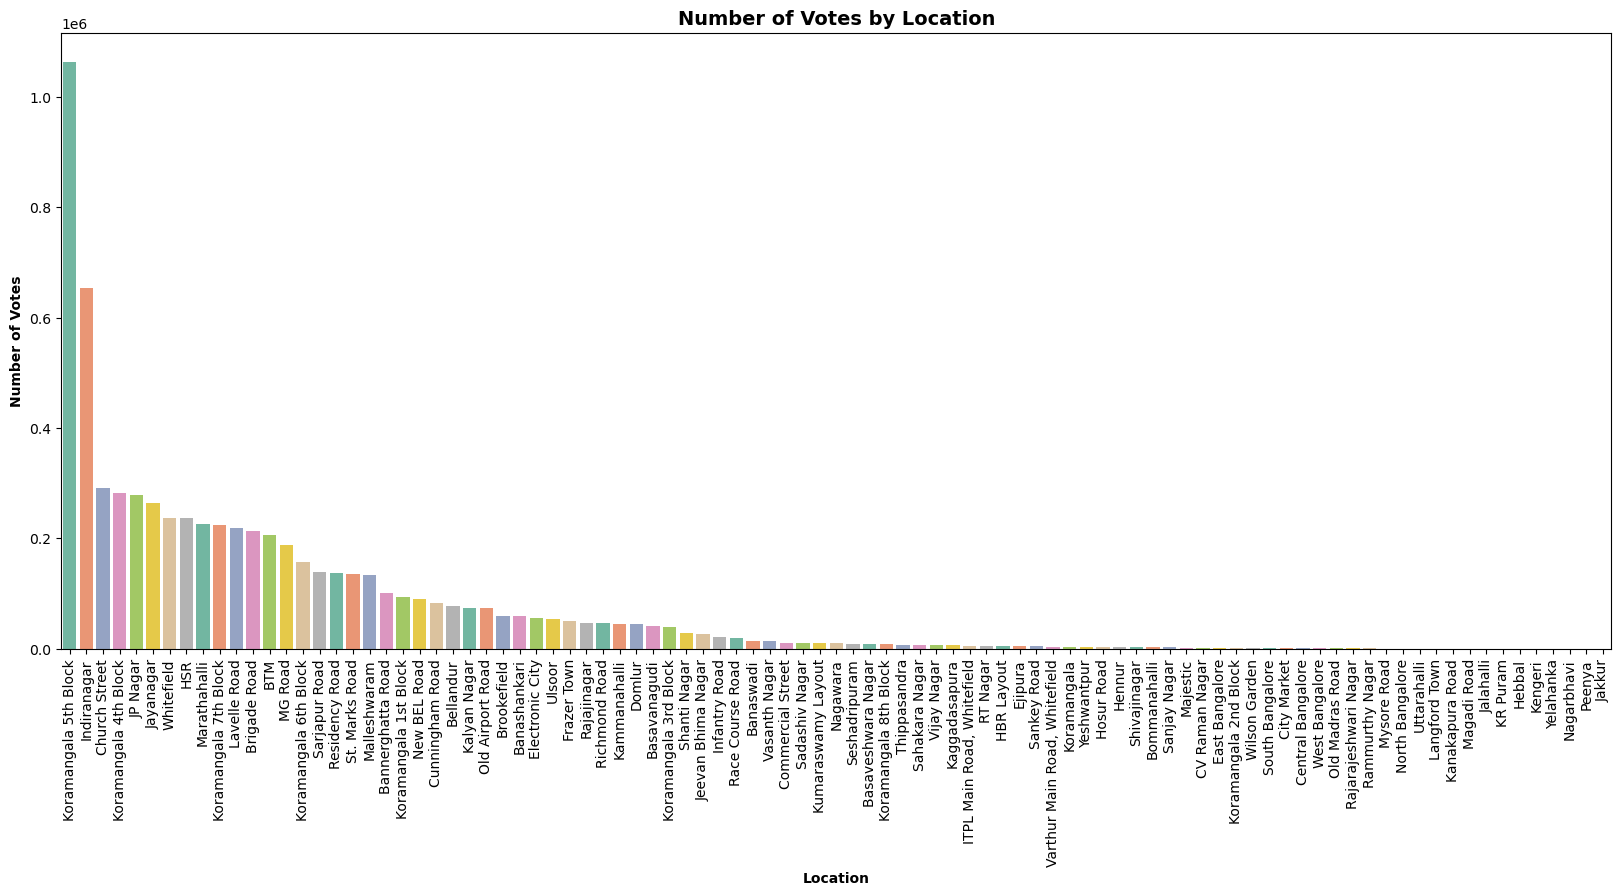

In [25]:
plt.figure(figsize = (20,8))
sns.barplot(x = 'location',
            y= 'votes',
           data = votes_by_location,
            palette = 'Set2')


plt.title('Number of Votes by Location', fontsize=14, fontweight='bold')
plt.xlabel('Location', fontsize=10, fontweight='bold')
plt.ylabel('Number of Votes', fontsize=10, fontweight='bold')


plt.xticks(rotation=90) 
plt.show()


# Location Frequency Analysis

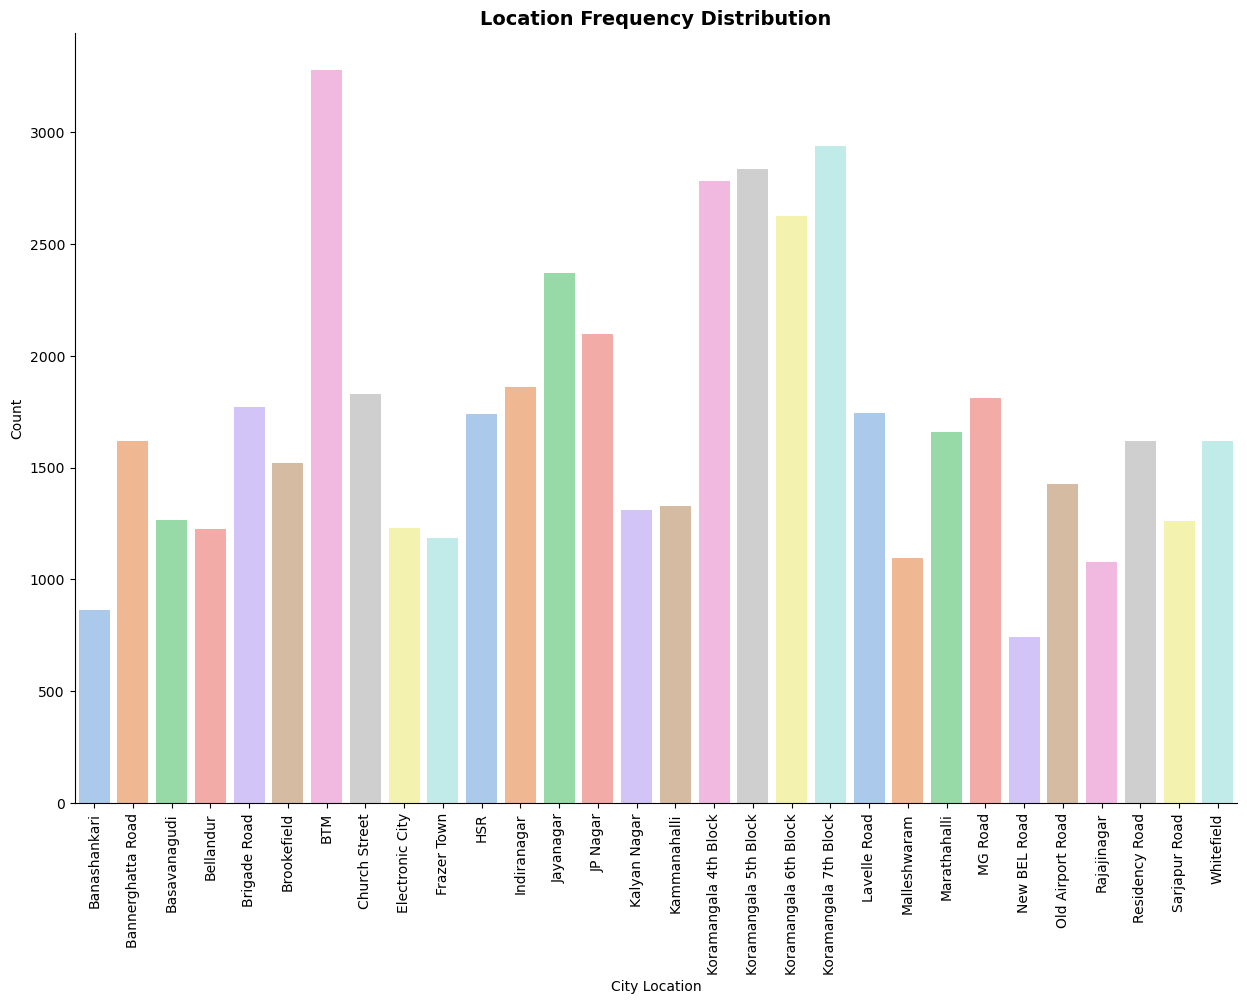

In [27]:
fig , ax = plt.subplots(figsize=(15,10))

sns.countplot(x= 'city_location',
             data = df,
             palette = "pastel")

ax.set_title('Location Frequency Distribution', fontsize=14 , fontweight='bold')
ax.set_xlabel('City Location')
ax.set_ylabel('Count')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xticks(rotation=90)
plt.show()

# Top 10 Most Popular Cuisines

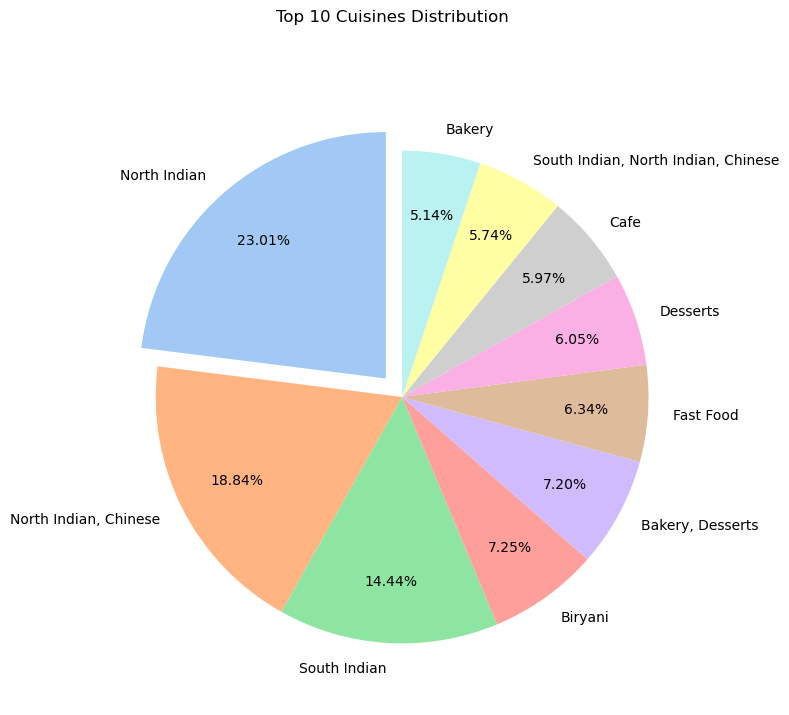

In [29]:
fig,ax = plt.subplots(figsize=(8,8))
colors = sns.color_palette('pastel')[0:10]

ax.pie(df['cuisines'].value_counts().values[:10],
       labels=df['cuisines'].value_counts().index[:10],
       autopct='%1.2f%%',
       startangle=90,
       pctdistance=0.75,
       colors=colors,
       explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)
       )
        

fig.suptitle("Top 10 Cuisines Distribution")
plt.show()


# Top 20 Restaurant Chains by Popularity in Bengaluru

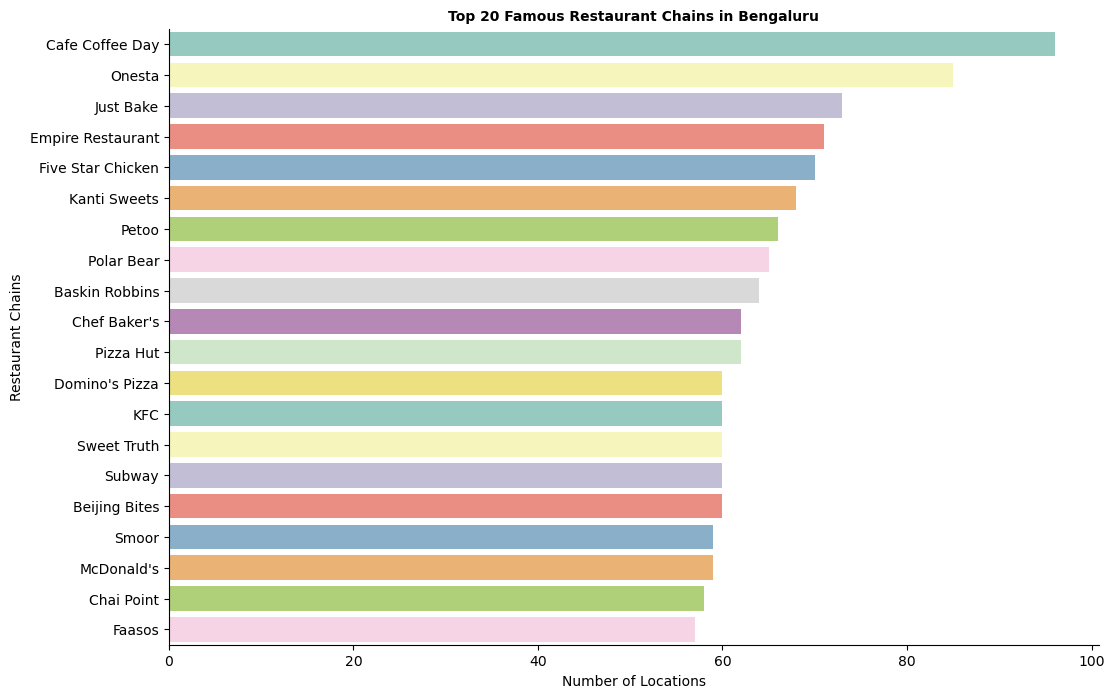

In [30]:
fig,ax= plt.subplots(figsize=(12,8))
chain_count=df['name'].value_counts()[:20]

ax = sns.barplot(x=chain_count,  
                 y=chain_count.index,
                 palette='Set3')


ax.set_title("Top 20 Famous Restaurant Chains in Bengaluru", fontsize=10, fontweight='bold')
ax.set_xlabel("Number of Locations")
ax.set_ylabel("Restaurant Chains")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()